### 1. Basic Pandas concepts

This part below is to help you review Pandas

In [1]:
import pandas as pd # pandas provides indexing structure and data manipulation functionality

**Practice 1: use csv file -  'campaign.csv' to complate 1.1 and 1.2 by yourselves**

#### 1.1 Reading data
Remember that local python runs in memory. If you're on a Windows machine, you can open the task manager to the memory tab and then run the below section. You should see a big spike in your memory usage as the dataframe loads.

We recommend your data be in csv format if you're working with pandas. The `read_csv` function makes it really easy to read in data. File name is the only required argument.

In [2]:
data = pd.read_csv("campaign.csv")
print(data)

          user_id date_served marketing_channel     test_control  converted  \
0      a100000029    1/1/2018         House Ads  personalization       True   
1      a100000030    1/1/2018         House Ads  personalization       True   
2      a100000031    1/1/2018         House Ads  personalization       True   
3      a100000032    1/1/2018         House Ads  personalization       True   
4      a100000033    1/1/2018         House Ads  personalization       True   
...           ...         ...               ...              ...        ...   
10017  a100007290   1/17/2018             Email          control       True   
10018  a100007291   1/17/2018             Email          control       True   
10019  a100007292    1/5/2018         Instagram          control      False   
10020  a100007293   1/17/2018             Email          control       True   
10021  a100007294    1/6/2018          Facebook          control      False   

      language_preferred    age_group date_subscrib

#### 1.2 Examine the data

`.shape` is an *attribute* of a DataFrame object. This means it's a built-it in characteristic automatically available for all DataFrames.

Specifically, `.shape` shows the dimensions of the df as rows, columns. In python, rows are axis=0 and columns are axis=1.

In [3]:
data.shape  # 10022 rows, 10 columns

(10022, 10)

`.columns` shows the names of the columns in your dataframe.
You can tell *attributes* and *methods* apart because the latter requires `()`.

*Note:* .columns returns an index object, which does not have great formatting when displayed. Lists have better default formatting. As the name implies, `tolist()` converts the `columns` result to a list.

In [4]:
index = data.columns
index.tolist()

['user_id',
 'date_served',
 'marketing_channel',
 'test_control',
 'converted',
 'language_preferred',
 'age_group',
 'date_subscribed',
 'date_canceled',
 'is_retained']

`.head(n)` shows the first n rows of the dataframe. If you omit n, it will return the first 5 rows.

By default, ipython notebook shows 60 rows and 20 columns when you preview a pandas dataframe. To modify this default, use `pd.set_option()`, e.g. `pd.set_option("display.max_rows",100)` or `pd.set_option("display.max_columns",100)`

In [5]:
data.head(6)

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,1/1/2018,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,1/1/2018,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,1/1/2018,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,1/1/2018,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,1/1/2018,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True
5,a100000034,1/1/2018,House Ads,personalization,True,German,45-55 years,1/1/2018,NaN,True


In [6]:
# look at the data
data.describe()

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
count,10022,10021,10022,10022,10022,10022,10022,1856,577,1856
unique,7294,31,5,2,2,4,7,31,115,2
top,a100000882,1/15/2018,House Ads,control,False,English,19-24 years,1/16/2018,4/2/2018,True
freq,12,789,4733,5076,8946,9260,1679,163,15,1279


`.describe()` provides summary statistics for both numeric and non-numeric data.

In [7]:
# look at the summary info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10022 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   test_control        10022 non-null  object
 4   converted           10022 non-null  bool  
 5   language_preferred  10022 non-null  object
 6   age_group           10022 non-null  object
 7   date_subscribed     1856 non-null   object
 8   date_canceled       577 non-null    object
 9   is_retained         1856 non-null   object
dtypes: bool(1), object(9)
memory usage: 714.6+ KB


 **Use square brackets to select Dataframes**
 - single bracket give a Pandas Series
 - double bracket give a Pandas Dataframe

In [8]:
data["age_group"]

0         0-18 years
1        19-24 years
2        24-30 years
3        30-36 years
4        36-45 years
            ...     
10017    45-55 years
10018      55+ years
10019      55+ years
10020     0-18 years
10021     0-18 years
Name: age_group, Length: 10022, dtype: object

In [9]:
data[["age_group"]]

,age_group
0,0-18 years
1,19-24 years
2,24-30 years
3,30-36 years
4,36-45 years
...,...
10017,45-55 years
10018,55+ years
10019,55+ years
10020,0-18 years


Check **duplicate** records for primary key column
- think about why duplicates could happen?

In [10]:
len(data["user_id"])   ### important to check duplicates

10022

In [11]:
len(data["user_id"].unique())    

7294

Use **DataFrame.nunique** to count distinct observations over requested axis (default is 0 for row-wise)

In [12]:
data["age_group"].nunique(0)
#f unction to find number of the unique values across the row/column axis.
# axis =1 across colums; axis = 0 across rows

7

For categorical fields or numeric fields with a small number of values, you can use `value_counts()` to see unique values and their frequency. 

In [13]:
data["age_group"].value_counts()

19-24 years    1679
24-30 years    1566
0-18 years     1537
30-36 years    1353
36-45 years    1351
45-55 years    1351
55+ years      1185
Name: age_group, dtype: int64

If you don't care about the frequency and just want an easily readable list of the values from a categorical field, use .unique()

In [14]:
data["language_preferred"].unique()

array(['English', 'German', 'Arabic', 'Spanish'], dtype=object)

In [15]:
data["language_preferred"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10017    False
10018    False
10019    False
10020    False
10021    False
Name: language_preferred, Length: 10022, dtype: bool

`.isnull()` is a method that returns true if values are null.

The code below:
1. Creates a boolean dataframe with True for null values and False for non-null values
2. Sums the number of True's by column (in python True=1 and False=0)

In [16]:
data.isnull()


,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
10017,False,False,False,False,False,False,False,False,False,False
10018,False,False,False,False,False,False,False,False,True,False
10019,False,False,False,False,False,False,False,False,True,False
10020,False,False,False,False,False,False,False,False,True,False


**get the number of Missing records in each column:**

In [17]:
data.isnull().sum()

user_id                  0
date_served              1
marketing_channel        0
test_control             0
converted                0
language_preferred       0
age_group                0
date_subscribed       8166
date_canceled         9445
is_retained           8166
dtype: int64

### 2. Campaign result overview

**.Groupby**, similar to Group by in SQL, it lets you group data, which is very powerful for analysis. A few things to know:

.groupby() returns a groupby object which then needs to be aggregated with count, sum, mean, median etc.
By default, .groupby() turns the column you group on into the index for the grouped data
.groupby() excludes missings!
The format for .groupby() is dataframe.groupby("column to group on")["column to summarize"].summary_function(). Both the "column to group on" and the "column to summarize" arguments can take more than one column if you input them as a list.

Some summary functions:

sum(), mean(), median(), min(), count(), max()

#### 2.1 How many users receive marketing offers by day?

In [18]:
#Group by date_served
daily_users = data.groupby(['date_served'])['user_id'].nunique() 
#to count how many dsitinct users recieved offers everyday

In [19]:
# select date_served, count(distinct user_id) from 
# data group by date_served;

In [20]:
print(daily_users)

date_served
1/1/2018     362
1/10/2018    337
1/11/2018    310
1/12/2018    301
1/13/2018    306
1/14/2018    305
1/15/2018    767
1/16/2018    388
1/17/2018    369
1/18/2018    318
1/19/2018    305
1/2/2018     374
1/20/2018    311
1/21/2018    229
1/22/2018    178
1/23/2018    172
1/24/2018    190
1/25/2018    184
1/26/2018    222
1/27/2018    320
1/28/2018    320
1/29/2018    319
1/3/2018     348
1/30/2018    317
1/31/2018    340
1/4/2018     323
1/5/2018     319
1/6/2018     308
1/7/2018     275
1/8/2018     312
1/9/2018     312
Name: user_id, dtype: int64


DataFrame.nunique(): Count distinct observations over requested axis.  

Visualization in Python

In [21]:
type(daily_users)

pandas.core.series.Series

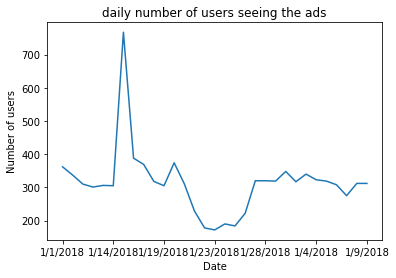

In [22]:
import matplotlib.pyplot as plt

# plot
daily_users.plot()

# annotate
plt.title('daily number of users seeing the ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.show()

**Question:** Waht is the issue with the chart above?

In [23]:
data['date_served']=pd.to_datetime(data['date_served']) # converts to a pandas datetime object
data['date_served']

0       2018-01-01
1       2018-01-01
2       2018-01-01
3       2018-01-01
4       2018-01-01
           ...    
10017   2018-01-17
10018   2018-01-17
10019   2018-01-05
10020   2018-01-17
10021   2018-01-06
Name: date_served, Length: 10022, dtype: datetime64[ns]

#### Practice 2
What is the overall conversion rate? hint: use column 'converted'

In [24]:
# whats the difference?
# there are repeated user_ids, so 'converted 'column may also have things repeated, needs to groupby id
data["converted"].sum()
data.groupby(["converted"])["user_id"].nunique()

converted
False    6854
True     1015
Name: user_id, dtype: int64

In [25]:
# number of people conderted (TRUE)/ number of people served
# boolean True is 1 so .sum()  # nunique() - count disdinct values; value_counts - return a list of distinct count for each
conversion_rate = data.groupby(["converted"])["user_id"].nunique()/data["user_id"].nunique()
print(conversion_rate)


converted
False    0.939676
True     0.139155
Name: user_id, dtype: float64


In [26]:
# Why is the sum of false and true rates larger than 1? Do we care about the false rate?
# -- because number of T+F records(7869) > number of users (7294)

#### 2.2 Common marketing metrics to evaluate campaign performance
- **Conversion rate** = Number of people who converted / Total number of people who received offers
- **Retention rate** = number of people who remained / Total number of people who converted

how to do filtering in Pandas:

In [27]:
# Step one: create a boolean mask
data['is_retained']==True

0         True
1         True
2         True
3         True
4         True
         ...  
10017    False
10018     True
10019     True
10020     True
10021     True
Name: is_retained, Length: 10022, dtype: bool

In [28]:
# Step two: put the boolean mask into the dataframe
# loc - filtering or condition
# Access a group of rows and columns by label(s) or a boolean array.
data.loc[data['is_retained']==True]    #select * from data where is_retained = True

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,0-18 years,1/1/2018,NaN,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,19-24 years,1/1/2018,NaN,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,24-30 years,1/1/2018,NaN,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,30-36 years,1/1/2018,NaN,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,36-45 years,1/1/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
10008,a100007281,2018-01-17,Email,control,True,German,30-36 years,1/17/2018,NaN,True
10018,a100007291,2018-01-17,Email,control,True,German,55+ years,1/17/2018,NaN,True
10019,a100007292,2018-01-05,Instagram,control,False,German,55+ years,1/17/2018,NaN,True
10020,a100007293,2018-01-17,Email,control,True,German,0-18 years,1/17/2018,NaN,True


In [29]:
retained = data.loc[data['is_retained']==True]['user_id'].nunique()
# select count(distinct user_id) from data where is_retained = True

In [30]:
print(retained)

678


In [31]:
converted = data.loc[data['converted']==True]['user_id'].nunique()

In [32]:
print(converted)

1015


In [33]:
retention_rate = retained / converted

In [34]:
print(round(retention_rate,2))

0.67


**Extra Practice**: plot accumulative response rate by day:

In [35]:
# accumulative conversion rate by day
daily_responder = data.loc[data['converted'] == True].groupby(['date_served'])['user_id'].nunique()
print(daily_responder)
# data.loc[data['converted'] - filter/condition
# .groupby(['date_served']) - group by date\
# ['user_id'].nunique() - count user id

date_served
2018-01-01    36
2018-01-02    37
2018-01-03    36
2018-01-04    35
2018-01-05    40
2018-01-06    35
2018-01-07    39
2018-01-08    36
2018-01-09    39
2018-01-10    40
2018-01-11    25
2018-01-12    23
2018-01-13    26
2018-01-14    26
2018-01-15    87
2018-01-16    99
2018-01-17    81
2018-01-18    29
2018-01-19    18
2018-01-20    21
2018-01-21    20
2018-01-22    22
2018-01-23    21
2018-01-24    22
2018-01-25    23
2018-01-26    20
2018-01-27    21
2018-01-28    20
2018-01-29    19
2018-01-30    21
2018-01-31    18
Name: user_id, dtype: int64


In [36]:
daily_responder.cumsum() # compute the cumulative sum of array elements over a given axis.

date_served
2018-01-01      36
2018-01-02      73
2018-01-03     109
2018-01-04     144
2018-01-05     184
2018-01-06     219
2018-01-07     258
2018-01-08     294
2018-01-09     333
2018-01-10     373
2018-01-11     398
2018-01-12     421
2018-01-13     447
2018-01-14     473
2018-01-15     560
2018-01-16     659
2018-01-17     740
2018-01-18     769
2018-01-19     787
2018-01-20     808
2018-01-21     828
2018-01-22     850
2018-01-23     871
2018-01-24     893
2018-01-25     916
2018-01-26     936
2018-01-27     957
2018-01-28     977
2018-01-29     996
2018-01-30    1017
2018-01-31    1035
Name: user_id, dtype: int64

<AxesSubplot:xlabel='date_served'>

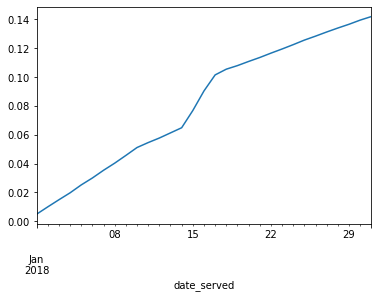

In [37]:
accu_response_by_day = daily_responder.cumsum() / data["user_id"].nunique()
accu_response_by_day.plot()

#### 2.3 Customer Segmentation analysis
 - Use segemetnation analysis to 
     - Analyze campaign performance by each segments
     - Target profitable segments for next campaign
     
 - Creating segmentation variables is the first step - usually this will happen in SQL

In [38]:
# Look at by marketing channel:
received_by_channel = data.groupby(['marketing_channel'])['user_id'].nunique()
type(received_by_channel)\
# dataframe after aggregation is series; 进行了聚合操作。可以看出聚合后输出为series

pandas.core.series.Series

In [39]:
# How many customers are converted in each marketing channel
converted_by_channel = data.loc[data['converted']==True].groupby(['marketing_channel'])['user_id'].nunique()

Conversion rate by channel

In [40]:
conversion_rate_by_channel = converted_by_channel / received_by_channel

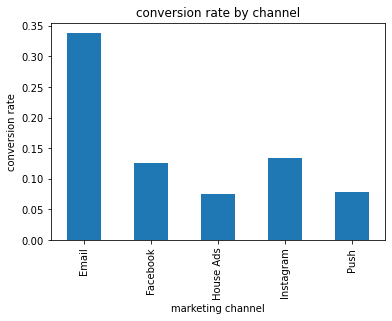

In [41]:
#plot conversion rate by channel:

import matplotlib.pyplot as plt

# bar chart
conversion_rate_by_channel.plot(kind='bar')

# annotate
plt.title('conversion rate by channel')
plt.xlabel('marketing channel')
plt.ylabel('conversion rate')
plt.show()

In [42]:
conversion_rate_by_channel = converted_by_channel / received_by_channel
df1 = conversion_rate_by_channel.reset_index() # Generate a new DataFrame or Series with the index reset.
df1.columns = ["Channel", "Percentage"]
print(df1)
type(df1)

     Channel  Percentage
0      Email    0.338156
1   Facebook    0.125711
2  House Ads    0.075101
3  Instagram    0.133333
4       Push    0.079218


pandas.core.frame.DataFrame

In [43]:
# using map to subtitute the values with formatted
df1["Percentage"] = df1["Percentage"].map('{:.2%}'.format)
print(df1)

     Channel Percentage
0      Email     33.82%
1   Facebook     12.57%
2  House Ads      7.51%
3  Instagram     13.33%
4       Push      7.92%


In [44]:
# dic = conversion_rate_by_channel.to_dict()   
# print(dic)

#### Practice 3
What is the retention rate by each marketing channel?

In [45]:
# Retention rate = number of people who remained / Total number of people who converted
# converted_by_channel = data.loc[data['converted']==True].groupby(['marketing_channel'])['user_id'].nunique()

In [46]:
retained_by_channel = data.loc[data['is_retained']==True].groupby(['marketing_channel'])['user_id'].nunique()
print(retained_by_channel)

marketing_channel
Email        139
Facebook     211
House Ads    378
Instagram    198
Push          95
Name: user_id, dtype: int64


In [47]:
retained_by_channel1 = data.loc[data['is_retained']==True].groupby(['marketing_channel']).nunique()
print(retained_by_channel1)

                   user_id  date_served  test_control  converted  \
marketing_channel                                                  
Email                  139           28             2          2   
Facebook               211           31             2          2   
House Ads              378           31             2          2   
Instagram              198           31             2          2   
Push                    95           30             2          2   

                   language_preferred  age_group  date_subscribed  \
marketing_channel                                                   
Email                               4          7               27   
Facebook                            3          7               31   
House Ads                           4          7               31   
Instagram                           3          7               31   
Push                                1          7               29   

                   date_canceled  is_re

In [48]:
retention_rate_by_channel = retained_by_channel / converted_by_channel
print(retention_rate_by_channel)

marketing_channel
Email        0.743316
Facebook     0.954751
House Ads    1.268456
Instagram    0.853448
Push         1.233766
Name: user_id, dtype: float64


In [49]:
# why some rate is >1 ?
# assumption 1: some who werent converted were still retained as regualr customer

# -- data investigation
inv = data.loc[(data['converted']==False) & (data['is_retained']==True)]
print(inv)
type(inv)

          user_id date_served marketing_channel     test_control  converted  \
22     a100000050  2018-01-01         House Ads  personalization      False   
24     a100000051  2018-01-01              Push  personalization      False   
26     a100000052  2018-01-01         House Ads  personalization      False   
28     a100000053  2018-01-01         House Ads  personalization      False   
30     a100000054  2018-01-01         House Ads  personalization      False   
...           ...         ...               ...              ...        ...   
9985   a100007258  2018-01-15             Email  personalization      False   
9993   a100007266  2018-01-16             Email  personalization      False   
10005  a100007278  2018-01-16             Email          control      False   
10019  a100007292  2018-01-05         Instagram          control      False   
10021  a100007294  2018-01-06          Facebook          control      False   

      language_preferred    age_group date_subscrib

pandas.core.frame.DataFrame

In [50]:
data.loc[data['user_id'] == 'a100000050']
# even though this still canbnot explain why rate is > 1, because we used 'nunique()', which only kept distinct user

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
21,a100000050,2018-01-02,House Ads,personalization,True,English,24-30 years,1/2/2018,NaN,True
22,a100000050,2018-01-01,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True


In [51]:
# more invegstigation
inv_id=inv['user_id']
print(inv_id)
type(inv_id)
# select user_id column from dataframe inv as series (converted false but restained true)

22       a100000050
24       a100000051
26       a100000052
28       a100000053
30       a100000054
            ...    
9985     a100007258
9993     a100007266
10005    a100007278
10019    a100007292
10021    a100007294
Name: user_id, Length: 578, dtype: object


pandas.core.series.Series

In [52]:
data['user_id'].isin(inv_id)  # boolean： 有遇到(converted false but restained true)这样情况的user则给他标记为TRUE

0        False
1        False
2        False
3        False
4        False
         ...  
10017    False
10018    False
10019     True
10020    False
10021     True
Name: user_id, Length: 10022, dtype: bool

In [53]:
data.loc[data['user_id'].isin(inv_id)] # 在data中选出有(converted false but restained true)情况的user的所有记录

# 之前我们用 data.loc[data['is_retained']==True].groupby(['marketing_channel']).nunique()
# nunique() this is aggregated witn in each channel.
# One customer might be reached by different channels but only converted through one channel, but 'is_retained' will be true for either of thyem anyway. 
# Example user a100000051

,user_id,date_served,marketing_channel,test_control,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained
21,a100000050,2018-01-02,House Ads,personalization,True,English,24-30 years,1/2/2018,NaN,True
22,a100000050,2018-01-01,House Ads,personalization,False,English,24-30 years,1/2/2018,NaN,True
23,a100000051,2018-01-02,House Ads,personalization,True,English,30-36 years,1/2/2018,NaN,True
24,a100000051,2018-01-01,Push,personalization,False,English,30-36 years,1/2/2018,NaN,True
25,a100000052,2018-01-02,House Ads,personalization,True,English,36-45 years,1/2/2018,NaN,True
...,...,...,...,...,...,...,...,...,...,...
9985,a100007258,2018-01-15,Email,personalization,False,German,24-30 years,1/15/2018,NaN,True
9993,a100007266,2018-01-16,Email,personalization,False,German,24-30 years,1/16/2018,NaN,True
10005,a100007278,2018-01-16,Email,control,False,German,0-18 years,1/16/2018,NaN,True
10019,a100007292,2018-01-05,Instagram,control,False,German,55+ years,1/17/2018,NaN,True


In [54]:
# how to avoid it?
# if converted is false then is retained should be N/A

In [55]:
# Does it make sense to look at Retention rate by differet marketing channels??
# No

##### 2.3.2 Customer Segmentation analysis by more than one segments

In [56]:
language_age_convert=data.loc[data['converted']==True].groupby(['language_preferred', 'age_group'])['user_id'].nunique()

In [57]:
print(language_age_convert)

language_preferred  age_group  
Arabic              0-18 years       4
                    19-24 years      2
                    24-30 years      8
                    36-45 years      1
                    45-55 years      3
                    55+ years        1
English             0-18 years     168
                    19-24 years    281
                    24-30 years    201
                    30-36 years     69
                    36-45 years     65
                    45-55 years     61
                    55+ years       66
German              0-18 years      13
                    19-24 years     14
                    24-30 years     17
                    30-36 years      3
                    36-45 years      4
                    45-55 years      6
                    55+ years        2
Spanish             0-18 years       7
                    19-24 years      6
                    24-30 years      2
                    30-36 years      5
                    36-45 years 

Unstack the result to a DataFrame, so that we can plot

In [58]:
type(language_age_convert)

pandas.core.series.Series

In [59]:
language_age_convert.unstack()  # similar to unnest (above is two level indexes) # pivot???

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,4.0,2.0,8.0,NaN,1.0,3.0,1.0
English,168.0,281.0,201.0,69.0,65.0,61.0,66.0
German,13.0,14.0,17.0,3.0,4.0,6.0,2.0
Spanish,7.0,6.0,2.0,5.0,4.0,5.0,7.0


In [60]:
df_language_age_convert=pd.DataFrame(language_age_convert.unstack(level=1))

In [61]:
print(df_language_age_convert)

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                     4.0          2.0          8.0          NaN   
English                  168.0        281.0        201.0         69.0   
German                    13.0         14.0         17.0          3.0   
Spanish                    7.0          6.0          2.0          5.0   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                      1.0          3.0        1.0  
English                    65.0         61.0       66.0  
German                      4.0          6.0        2.0  
Spanish                     4.0          5.0        7.0  


In [62]:
type(df_language_age_convert)

pandas.core.frame.DataFrame

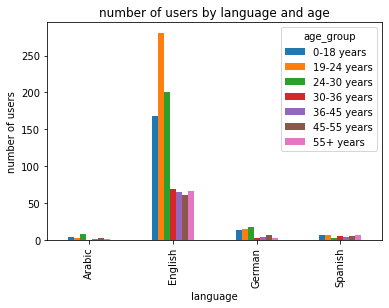

In [63]:
# plot
df_language_age_convert.plot(kind='bar')

# annotate
plt.title('number of users by language and age')
plt.xlabel('language')
plt.ylabel('number of users')
plt.show()

#### Practice 4
Looking at the number of **converted users** by these 2 segments are not very informative.

Should we look at conversion rate by language and age?

In [64]:
language_age = data.groupby(['language_preferred','age_group'])['user_id'].nunique()
print(language_age)  # select group that organized by language and age

language_preferred  age_group  
Arabic              0-18 years       16
                    19-24 years      18
                    24-30 years      16
                    30-36 years      12
                    36-45 years      13
                    45-55 years      14
                    55+ years        17
English             0-18 years     1124
                    19-24 years    1215
                    24-30 years    1119
                    30-36 years     976
                    36-45 years     991
                    45-55 years     976
                    55+ years       920
German              0-18 years       24
                    19-24 years      23
                    24-30 years      29
                    30-36 years      12
                    36-45 years      14
                    45-55 years      20
                    55+ years         9
Spanish             0-18 years       43
                    19-24 years      51
                    24-30 years      54
        

In [65]:
df_language_age= pd.DataFrame(language_age.unstack(level=1))
print(df_language_age)

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      16           18           16           12   
English                   1124         1215         1119          976   
German                      24           23           29           12   
Spanish                     43           51           54           57   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       13           14         17  
English                     991          976        920  
German                       14           20          9  
Spanish                      39           47         34  


In [66]:
df_language_age_convt_rate=df_language_age_convert/df_language_age
df_language_age_convt_rate

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,0.250000,0.111111,0.500000,NaN,0.076923,0.214286,0.058824
English,0.149466,0.231276,0.179625,0.070697,0.065590,0.062500,0.071739
German,0.541667,0.608696,0.586207,0.250000,0.285714,0.300000,0.222222
Spanish,0.162791,0.117647,0.037037,0.087719,0.102564,0.106383,0.205882


### 3. A/B Testing

What is A/B testing:

- A/B testing, sometimes referred to as split testing, is the process of comparing two different marketing strategies to determine which one performs better
- Testing allows us to understand marketing impact

In a typical A/B testing setting, you would create and test two or more versions of marketing strategies for their effectiveness in achieving your marketing goal. Consider a case where your goal is to improve marketing email open rates. 

If your hypothesis is that email subject line B will result in higher open rates than email subject line A, then you would run an A/B test with these two subject lines. You will randomly select half of the users and send out marketing emails with subject line A. The other half of randomly selected users will receive emails with subject line B. You will run this test for a predetermined period of time (which could be one week, two weeks, or one month, for instance) or until a predetermined number of users receive the two versions of emails (which is a minimum of 1,000 users to receive each version of the subject line). Once your tests are complete, then you analyze and evaluate the experiment results. When analyzing the results, you will need to check whether there is a statistically significant difference between the results of the two versions.

In [67]:
from scipy import stats
import numpy as np

In [68]:
data['test_control'].value_counts()    # use value_counts() to see unique values and their frequency.

control            5076
personalization    4946
Name: test_control, dtype: int64

In [69]:
# Let's only look at Email marketing channel   # .loc[] is primarily label based, but may also be used with a boolean array.
email = data.loc[data['marketing_channel'] == 'Email']
type(email)

pandas.core.frame.DataFrame

In [70]:
print(email)

          user_id date_served marketing_channel     test_control  converted  \
354    a100000526  2018-01-01             Email  personalization       True   
358    a100000530  2018-01-05             Email  personalization       True   
362    a100000534  2018-01-09             Email  personalization      False   
366    a100000538  2018-01-13             Email  personalization       True   
370    a100000542  2018-01-17             Email  personalization       True   
...           ...         ...               ...              ...        ...   
10015  a100007288  2018-01-17             Email          control       True   
10016  a100007289  2018-01-17             Email          control       True   
10017  a100007290  2018-01-17             Email          control       True   
10018  a100007291  2018-01-17             Email          control       True   
10020  a100007293  2018-01-17             Email          control       True   

      language_preferred    age_group date_subscrib

For email channel, there are the test groups which received personalization email and the control group which receive normal email

In [71]:
email.groupby(['test_control'])['user_id'].nunique()

test_control
control            270
personalization    284
Name: user_id, dtype: int64

In [72]:
# Let's compare the conversion rate between test and control group
email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()
# number of people who are converted in each group

test_control
control             76
personalization    111
Name: user_id, dtype: int64

In [73]:
test_control_converted_rate = email.loc[email['converted']==True].groupby(['test_control'])['user_id'].nunique()\
/email.groupby(['test_control'])['user_id'].nunique()

Calculate the lift:

(Test conversion rate - Control conversion rate) / Control converstion rate

In [74]:
lift = (0.390845 - 0.281481)/ 0.281481   # increased rate of test group 

In [75]:
print(lift)

0.38853066459192637
